In [6]:
import pandas as pd
import numpy as np


In [7]:
df=pd.read_csv('Email_spam.csv',encoding="ISO-8859-1", on_bad_lines='skip')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [11]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [12]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# remove duplicates
df.drop_duplicates(keep='first',inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

<Axes: xlabel='target', ylabel='None'>

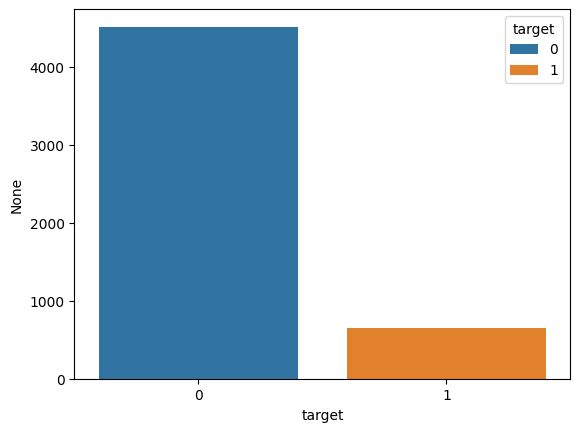

In [21]:
# EDA
#unsing bar grapg check count of ham and spam

import matplotlib.pyplot as plt
import seaborn as sns
y=df.value_counts('target')
sns.barplot(x=y.index,y=y,hue=y.index)

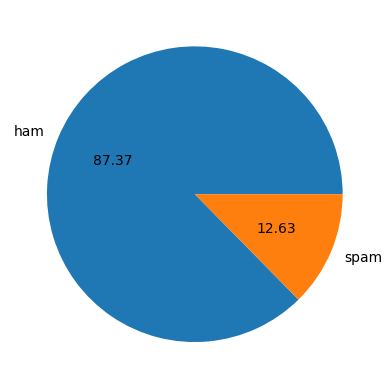

In [22]:
plt.pie(y,labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [23]:
import nltk
# download dependency
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# count the no of chracters in text msg
df["no_character"]=df["text"].apply(len)

In [26]:
df["no_of_word"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
# Count no of sentence
df["no_of_sentence"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,no_character,no_of_word,no_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
# know info abount ham msg
df[df["target"]==0][['no_character','no_of_word','no_of_sentence']].describe()

,no_character,no_of_word,no_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# know info about spam
df[df["target"]==1][['no_character','no_of_word','no_of_sentence']].describe()

,no_character,no_of_word,no_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='no_of_word', ylabel='Count'>

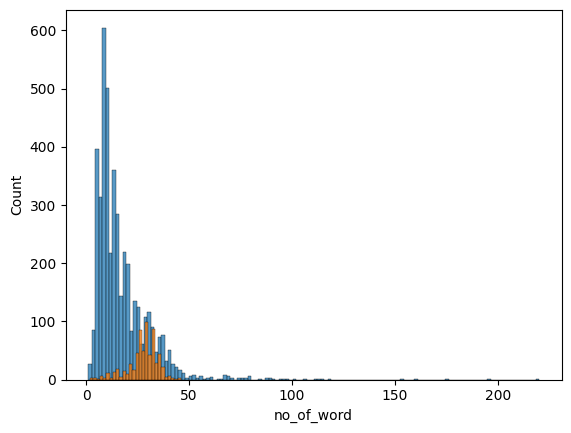

In [31]:
# histplot to show the the no word use in spam and in ham msg
sns.histplot(df[df["target"]==0]["no_of_word"])
sns.histplot(df[df["target"]==1]['no_of_word'])

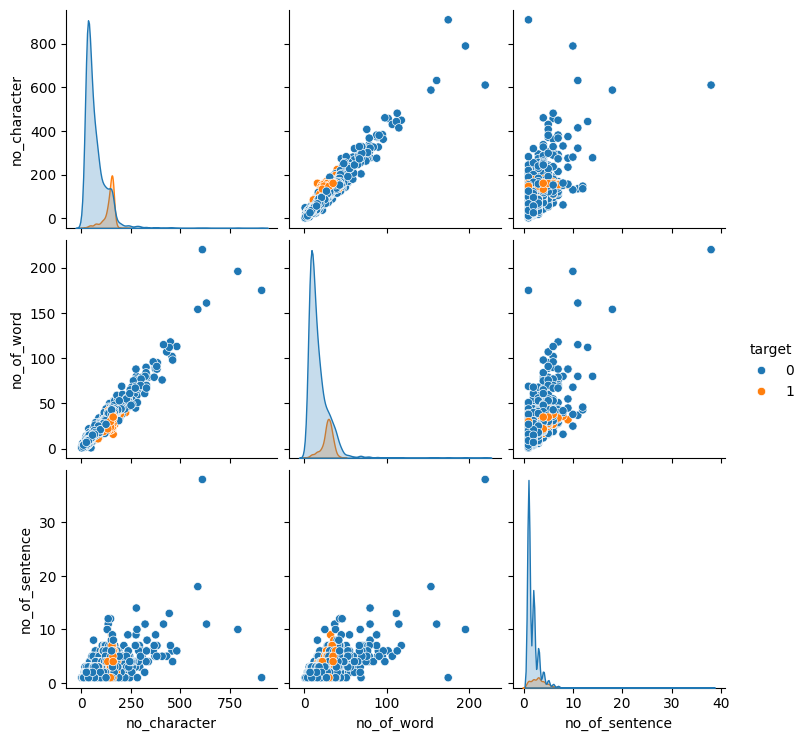

In [32]:
sns.pairplot(df,hue='target')

Data preprocessing steps for textual data Lower case Tokenization Removing special characters Removing stop words and punctuation (stop word - those words who not contribute i meaning like is ,am, are,has ) stemming (dancing,dances,danced will changed to one Dance)

In [33]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
nltk.download('PorterStemmer')
ps=PorterStemmer()


def text_prepro(text):

  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading PorterStemmer: Package 'PorterStemmer' not
[nltk_data]     found in index


In [34]:
df["transform_data"] = df['text'].apply(text_prepro)
df.head()

,target,text,no_character,no_of_word,no_of_sentence,transform_data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

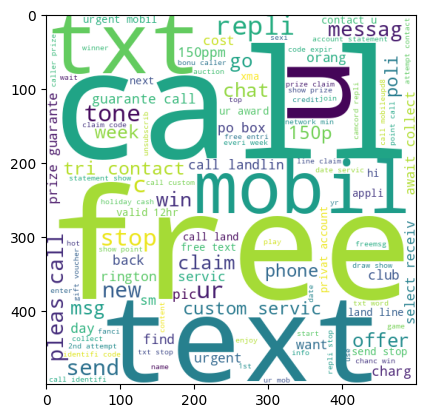

In [36]:
spam_wc=wc.generate(df[df["target"]==1]['transform_data'].str.cat(sep=" "))
plt.imshow(spam_wc)

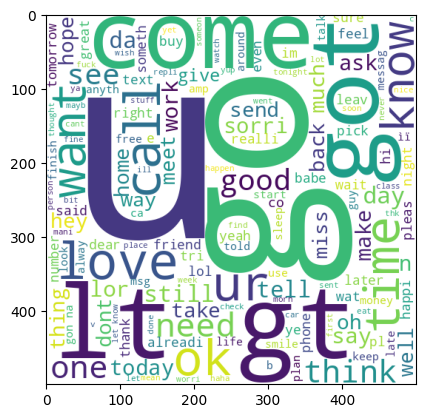

In [37]:
ham_wc=wc.generate(df[df["target"]==0]['transform_data'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [38]:
df.head()

,target,text,no_character,no_of_word,no_of_sentence,transform_data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
top_spam=[]
for msg in df[df["target"]==1]["transform_data"].tolist():

    for word in msg.split():
        top_spam.append(word)

In [40]:
len(top_spam)

9939

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia')])

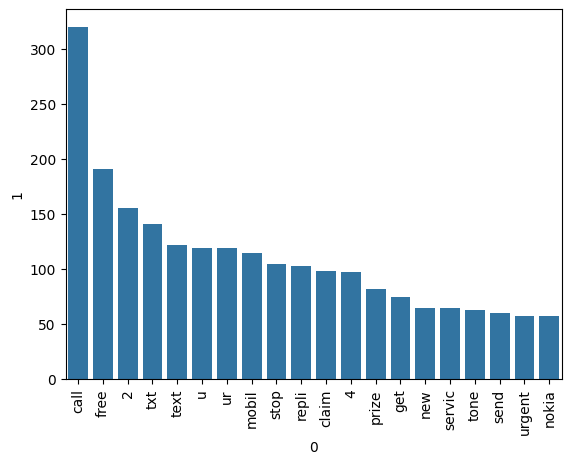

In [41]:
from collections import Counter
pd.DataFrame(Counter(top_spam).most_common(20))[1]
sns.barplot(x=pd.DataFrame(Counter(top_spam).most_common(20))[0],y=pd.DataFrame(Counter(top_spam).most_common(20))[1])
plt.xticks(rotation="vertical")

In [44]:
top_ham=[]
for msg in df[df["target"]==0]['transform_data'].tolist():

  for word in msg.split():

    top_ham.append(word)

In [45]:
len(top_ham)

35404

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one')])

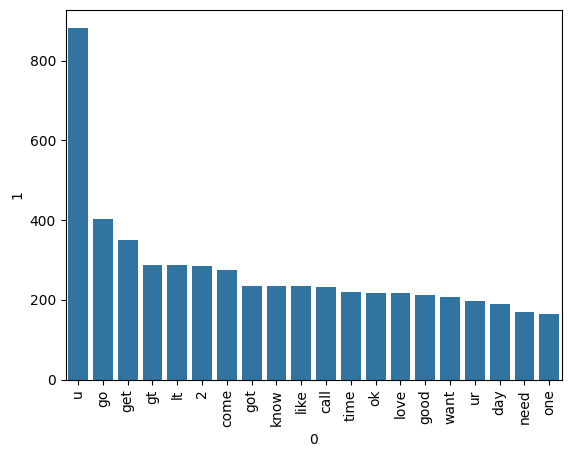

In [46]:
sns.barplot(x=pd.DataFrame(Counter(top_ham).most_common(20))[0],y=pd.DataFrame(Counter(top_ham).most_common(20))[1])
plt.xticks(rotation="vertical")

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df["transform_data"]).toarray()

In [48]:
x.shape

(5169, 3000)

In [49]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2)

In [51]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import GridSearchCV
gnb= GaussianNB()

mnb = MultinomialNB()

bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,Y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_pred1,y_test))

0.8694390715667312
[[788  27]
 [108 111]]
0.8043478260869565


In [54]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_pred2,y_test))

0.9709864603481625
[[896  30]
 [  0 108]]
0.782608695652174


In [55]:
bnb.fit(X_train,Y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))
print(precision_score(y_pred3,y_test))

0.9835589941972921
[[895  16]
 [  1 122]]
0.8840579710144928


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
lr = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB()

In [58]:
clfs = {
    'lr': lr,
    'svc': svc,
    'dtc': dtc,
    'rfc': rfc,
    'abc': abc,
    'gbc': gbc,
    'knc': knc,
    'Nb':mnb
}

In [59]:
def train(clf,X_train,Y_train,X_test,y_test):

    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [60]:
train(mnb,X_train,Y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [61]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():

    current_accuracy,current_precision = train(clf,X_train,Y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  lr
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  svc
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  dtc
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  rfc
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  abc
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  gbc
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  knc
Accuracy -  0.9052224371373307
Precision -  1.0
For  Nb
Accuracy -  0.9709864603481625
Precision -  1.0


In [62]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [63]:
temp_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [64]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,knc,0.905222,1.000000,0.905222,1.000000
1,Nb,0.970986,1.000000,0.970986,1.000000
2,rfc,0.975822,0.982906,0.975822,0.982906
3,svc,0.975822,0.974790,0.975822,0.974790
4,lr,0.958414,0.970297,0.958414,0.970297
5,abc,0.960348,0.929204,0.960348,0.929204
6,gbc,0.946809,0.919192,0.946809,0.919192
7,dtc,0.932302,0.833333,0.932302,0.833333


In [65]:
# use of voting classifiers
svc = SVC(kernel="sigmoid",gamma=1.0,probability=True)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('Nb', mnb), ('rfc', rfc)],voting='soft')



In [66]:
voting.fit(X_train,Y_train)
y_pred= voting.predict(X_test)

In [67]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9831932773109243


In [68]:
# Applying stacking
estimators=[('svm', svc), ('Nb', mnb)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9787234042553191
Precision 0.9461538461538461


In [69]:
import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))
with open('vectorizer.pkl','wb') as j:
    pickle.dump(tfidf,j)
print('done')
with open('Model.pkl','wb') as f:
    pickle.dump(mnb,f)
print('done')

done
done
